# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Uploading and Visualising the data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


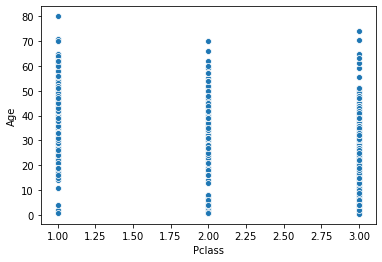

In [4]:
sns.scatterplot('Pclass', 'Age', data = df)

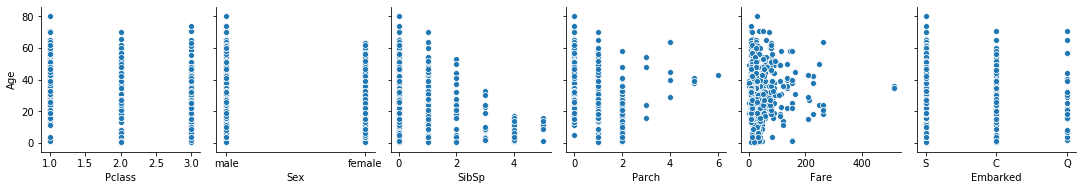

In [5]:
sns.pairplot(x_vars = ['Pclass', 'Sex', 'SibSp','Parch', 'Fare', 'Embarked'], y_vars = 'Age', data = df)

# Missing value Handling

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Grouping the Age and Siblings/Spouses column to see what was the age category with respect to the number of siblings together

In [7]:
df.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding out the number of rows where Age is null with respect to Sibling/Spouse count

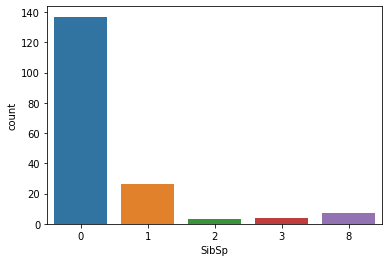

In [8]:
sns.countplot(x = 'SibSp', data = df[df['Age'].isnull()])

Filling the Age column where it is null

In [9]:
df['Age'].median()

28.0

In [10]:
df['Age'] = np.where((df['SibSp']==8) & (df['Age'].isnull()), 28.0, df['Age'])

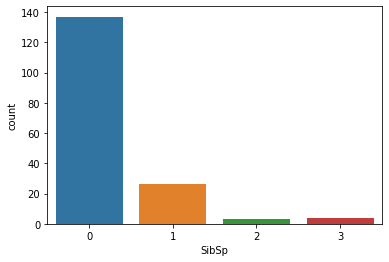

In [11]:
sns.countplot(x = 'SibSp', data = df[df['Age'].isnull()])

In [12]:
df['Age'] = np.where((df['SibSp']==0) & (df['Age'].isnull()), 29.0, df['Age'])
df['Age'] = np.where((df['SibSp']==1) & (df['Age'].isnull()), 30.0, df['Age'])
df['Age'] = np.where((df['SibSp']==2) & (df['Age'].isnull()), 23.0, df['Age'])
df['Age'] = np.where((df['SibSp']==3) & (df['Age'].isnull()), 10.0, df['Age'])

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling the Embarked column with the maximum occurence value where it is null

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'].fillna('S', inplace = True) 

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Dropping the columns which are of no use in predictions

In [17]:
df.drop(columns = ['Name','PassengerId','Ticket','Cabin'], inplace = True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Outliers Handling

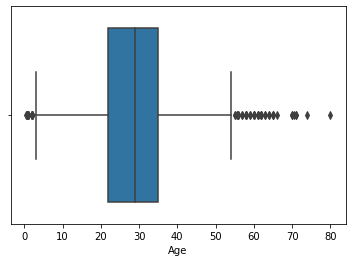

In [19]:
sns.boxplot(df['Age'])

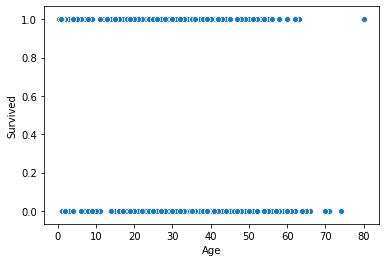

In [20]:
sns.scatterplot('Age', 'Survived', data = df)

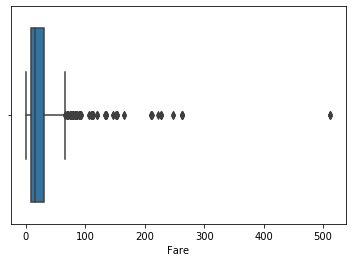

In [21]:
sns.boxplot(df['Fare'])

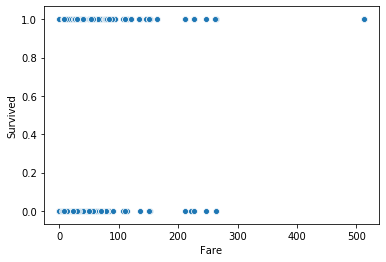

In [22]:
sns.scatterplot('Fare', 'Survived', data = df)

In [23]:
df.sort_values(by = 'Fare', ascending = False)[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [24]:
df.drop(df[df['Fare']>500].index, inplace = True)

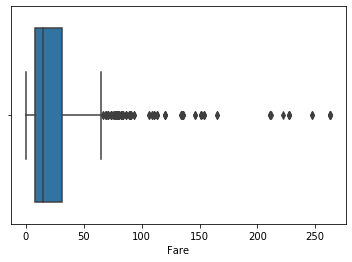

In [25]:
sns.boxplot(df['Fare'])

# Using Logistic Regression Model to predict chances of survival

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Clubbing Numerical columns into a separate variable 

In [27]:
num_cols = df.select_dtypes(include=[np.number]).columns

In [28]:
titanic_number = df[num_cols]

# Create dummy variable for character data

In [29]:
chara_cols = df.select_dtypes(include = 'object').columns

In [30]:
titanic_dummies = pd.get_dummies(df[chara_cols])

In [31]:
titanic_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


# Combining numerical and dummy variables

In [32]:
titanic_combined = pd.concat([titanic_number, titanic_dummies],axis = 1)

In [33]:
titanic_combined.drop(columns=['Sex_male','Embarked_C'],inplace=True)

In [34]:
titanic_combined.shape

(888, 9)

In [35]:
x = titanic_combined.drop(columns = ['Survived'])
y = titanic_combined['Survived']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.75, random_state = 0)

In [37]:
x_train.shape

(666, 8)

In [38]:
x_test.shape

(222, 8)

# Creating Model

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Sharad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred1 = lr.predict(x_train)
y_pred = lr.predict(x_test)

# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111  20]
 [ 31  60]]


In [43]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy_Train', accuracy1)
print('Accuracy_Test', accuracy)

Accuracy_Train 0.8198198198198198
Accuracy_Test 0.7702702702702703


# Area under ROC curve

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
area_under_roc = roc_auc_score(y_test,y_pred)
print(area_under_roc)

0.7533344518077342


# Plotting the Roc curve

In [46]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])
# fpr -- false positive rate, tpr-- true positive rate

In [47]:
type(pd.Series(thresholds))
fpr_Series = pd.Series(fpr)
tpr_Series = pd.Series(tpr)
thresholds_Series = pd.Series(thresholds)
df = pd.concat([fpr_Series, tpr_Series,thresholds_Series],axis = 1, keys = ['FPR', 'TPR', 'THRESHOLD'])
df.sort_values(by ='TPR', ascending = False)

,FPR,TPR,THRESHOLD
75,1.000000,1.000000,0.039194
74,0.954198,1.000000,0.048934
73,0.954198,0.978022,0.054586
72,0.870229,0.978022,0.074078
71,0.862595,0.967033,0.074644
...,...,...,...
5,0.015267,0.318681,0.809933
2,0.000000,0.131868,0.926012
3,0.007634,0.131868,0.919359
1,0.000000,0.010989,0.957827


In [48]:
lr.predict_proba(x_test)
# As the cut off value is 0.5 by default, on the basis of the result it classifies the result into 0 and 1.

array([[0.30183249, 0.69816751],
       [0.91291131, 0.08708869],
       [0.19482397, 0.80517603],
       [0.92274804, 0.07725196],
       [0.74062569, 0.25937431],
       [0.7777952 , 0.2222048 ],
       [0.74896119, 0.25103881],
       [0.05084171, 0.94915829],
       [0.44463848, 0.55536152],
       [0.67503325, 0.32496675],
       [0.93770874, 0.06229126],
       [0.06953841, 0.93046159],
       [0.27193468, 0.72806532],
       [0.68650152, 0.31349848],
       [0.26380535, 0.73619465],
       [0.92535583, 0.07464417],
       [0.37982182, 0.62017818],
       [0.45637307, 0.54362693],
       [0.86849391, 0.13150609],
       [0.04861113, 0.95138887],
       [0.6670373 , 0.3329627 ],
       [0.05190279, 0.94809721],
       [0.58082328, 0.41917672],
       [0.72618715, 0.27381285],
       [0.04217341, 0.95782659],
       [0.85471078, 0.14528922],
       [0.3515701 , 0.6484299 ],
       [0.51219595, 0.48780405],
       [0.58084324, 0.41915676],
       [0.74179929, 0.25820071],
       [0.

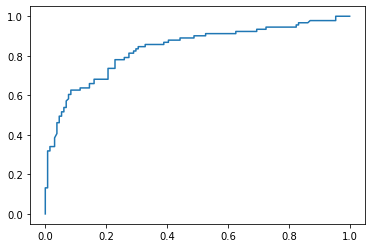

In [49]:
plt.plot(fpr,tpr)

# Using Decision Tree to predict chances of survival

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
import statsmodels.api as sm

In [52]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.456269
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  888
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            7
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.3138
Time:                        18:26:51   Log-Likelihood:                -405.17
converged:                       True   LL-Null:                       -590.45
Covariance Type:            nonrobust   LLR p-value:                 4.873e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5486      0.089     -6.142      0.000      -0.724      -0.374
Age           -0.0139      0.

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

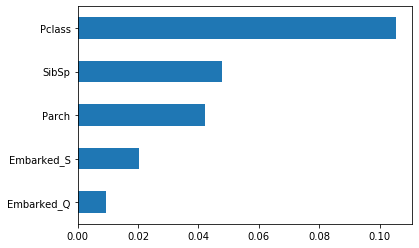

In [54]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nsmallest(5).plot(kind='barh')
plt.show()

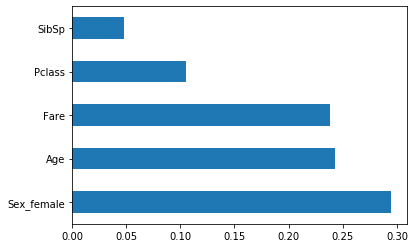

In [55]:
feat_importances.nlargest(5).plot(kind='barh');

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=8)
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1.fit(x_train,y_train)
y_pred1 = dt1.predict(x_train)
y_pred = dt1.predict(x_test)
print("Accuracy_Train:",accuracy_score(y_train, y_pred1))
print("Accuracy_Test:",accuracy_score(y_test, y_pred))

Accuracy_Train: 0.8534621578099839
Accuracy_Test: 0.8127340823970037


In [57]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7666161309884779

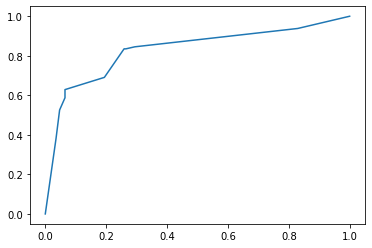

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, dt1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)

# Random Forest

Using Random Search CV

In [59]:
from sklearn import *
rf_model = ensemble.RandomForestClassifier(n_estimators=150,criterion='entropy',
                                          class_weight='balanced',
                                           max_leaf_nodes=12,
                                          random_state=15)
rf_model.fit(x_train, y_train)

y_pred_test = rf_model.predict(x_test)
y_pred_train = rf_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Train: 0.8486312399355878
Accuracy Test: 0.7752808988764045


In [60]:
model_params = {'n_estimators' : [140,145,150,155,160], 'max_leaf_nodes' : range(10,20), 'criterion' : ['gini', 'entropy']}

In [61]:
rf_model = ensemble.RandomForestClassifier(random_state = 15)
grid_search_object = model_selection.GridSearchCV(rf_model, model_params, cv = 3)

In [62]:
grid_search_best_model = grid_search_object.fit(x_train, y_train)

In [63]:
y_pred_test = grid_search_best_model.predict(x_test)
y_pred_train = grid_search_best_model.predict(x_train)


print('Accuracy Train:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Train: 0.8615136876006442
Accuracy Test: 0.8127340823970037


In [64]:
grid_search_best_model.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 16, 'n_estimators': 145}

Conclusion - 
According to me, I will use Decision Tree algorithm in predicting survival of the passengers travelling on Titanic.
As I'm getting good accuracy of the model and there is less difference between the Train and Test model.